## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### <span style="color:red"> H(x) = aX + b 에서처럼, F = C*1.8 +32  </span>
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
<u><span style="color:red">[Chain Rule 증명](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1b/a/proving-the-chain-rule) </span></u>

<br><br>

---

**선형회귀는 쉽게 접근하면 쉽고, 어렵게 접근하면 매우 어려운 모델이다.**

<선행되어야할 두가지 정의><br><br>
1) 가장 기본적인 수식 (Hypothesis Function) <br><br>
2) Cost Function 
- Cost는 비용인데, Learning을 언제 멈출지를 결정하는 요인이 된다.
- 비용이 적을 수록 좋을 것.
- 머신, 딥러닝에서도 학습을하면서 모델이 멈춰야 하는 시점을 알아야하는데, 비용이 없을때가 그 포인트이다.
    - 이걸 가능하게 하는 것 중 하나가 Mean Square Error(MSE) cost function.
- 미분을 이용하게 된다.
<br><br>

3) Learning rate
- 학습속도와 관련있는 하이퍼파라미터.
    - 하이퍼파라미터를 튜닝한다... 라고 할때 접근하는 애들.
- High learning rate -> 발산(Divergence)
- Low learning rate -> slow learning speed.
- **Recommended value**
    - 0.01~0.004



### Configuration (or prerequisite)

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

####  <span style="color:blue">선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성</span>
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

In [30]:
'''
섭씨온도 데이터를 담고있는 C의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
C의 첫 10개 값을 확인합니다. 
'''
C = np.random.randint(100,size=100) #0~99까지의 랜덤한 정수


In [31]:
C[:10]

array([70, 89, 59, 88, 78, 23, 98, 46, 11, 55])

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### <span style="color:blue">우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성.</span> 
이 데이타가 오늘 다룰 **학습 모델 알고리즘의 Label이 될 것이다.**

### Bias (편향 찾기) -- Weight는 1.8

- Weight를 찾기 훨씬 어려우므로... 
- 상대적으로 쉬운 Bias찾기부터.

####  <span style="color:blue">Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.</span>

In [32]:
F = C * 1.8 +32
F

array([158. , 192.2, 138.2, 190.4, 172.4,  73.4, 208.4, 114.8,  51.8,
       131. , 102.2, 172.4,  51.8, 210.2, 199.4, 188.6, 105.8, 116.6,
       183.2, 152.6,  64.4,  46.4, 140. , 203. ,  80.6,  53.6, 152.6,
       165.2, 154.4,  44.6, 203. , 118.4,  87.8, 114.8, 204.8,  80.6,
        75.2,  32. , 172.4, 159.8, 197.6, 150.8,  46.4,  96.8,  77. ,
        48.2, 204.8,  89.6,  91.4, 102.2, 176. ,  84.2,  95. , 141.8,
        39.2, 210.2,  89.6, 116.6,  37.4, 168.8, 195.8,  35.6, 156.2,
        46.4, 197.6,  46.4,  73.4, 172.4,  84.2, 114.8,  95. , 201.2,
       140. ,  39.2, 102.2, 186.8,  84.2, 113. , 168.8, 152.6, 105.8,
        64.4, 206.6,  68. ,  50. , 161.6, 123.8, 156.2,  68. ,  69.8,
        98.6, 113. , 158. , 109.4,  73.4, 203. , 192.2,  51.8,  71.6,
       145.4])

In [33]:
F[:10]

array([158. , 192.2, 138.2, 190.4, 172.4,  73.4, 208.4, 114.8,  51.8,
       131. ])

### Visualization

- 위에서 만든 섭씨, 화씨 온도를 Feature, label이 되도록 그려본다. (Weight, bias 다 주어진 상태)

In [34]:
#한글깨짐 방지 

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')


Text(0, 0.5, '화씨온도')

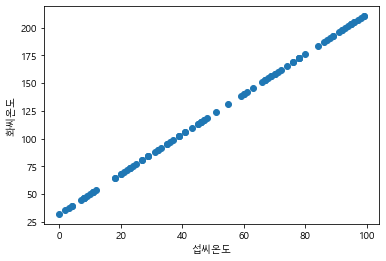

In [35]:
plt.scatter(C,F)
plt.xlabel("섭씨온도")
plt.ylabel("화씨온도")

---

- 편향찾기 -- Weight는 1.8

In [36]:
#먼저 앞서 생성한 섭씨온도 X, 화씨온도 y변수에 할당

X = C

y = F #실제값.

In [37]:
#W,b둘다 찾으려면 다소 어려울 수 있으므로.. bias값만 찾아보자.
w = 1.8

#b값은 랜덤하게... 학습이 용이하게 될 수 있는 분포를 가진 값
b = np.random.uniform(low=-1.0,high=1) #low 와 high 지정 가능

w,b

(1.8, -0.053514330914005814)

In [38]:
#위에서 지정한 w(1.8) , b(랜덤한 값)을 가지고 가설을 하나 세우자.

y_predict = w*X + b  #y값에대한 가설. 
y_predict[:10] #10개만 뽑아보자.

array([125.94648567, 160.14648567, 106.14648567, 158.34648567,
       140.34648567,  41.34648567, 176.34648567,  82.74648567,
        19.74648567,  98.94648567])

### 실제값과 예측한 값 사이의 거리... visualization

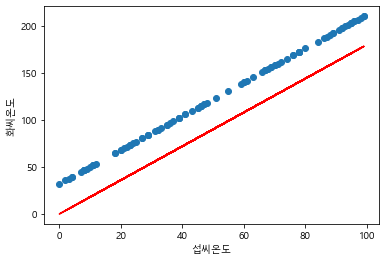

In [39]:
plt.scatter(C,F)
plt.plot(C,y_predict,c ='r')
plt.xlabel("섭씨온도")
plt.ylabel("화씨온도")
plt.show()

In [40]:
#b값 (y절편값 보정!) 어떻게?

#b값의 오차는 기본 b값에 (y예측값에 실제값을 뺀 것)을 뺀 것이 될 것이다.

In [41]:
b = b-(y_predict - y).mean()

#예측값에서 실제값을 뺴면... error가 얼마만큼인지 알수있고 
#오차만큼 b에 보정을 해준다.
b

32.0

In [42]:
y_predict = w*X + b
y_predict[:10]

array([158. , 192.2, 138.2, 190.4, 172.4,  73.4, 208.4, 114.8,  51.8,
       131. ])

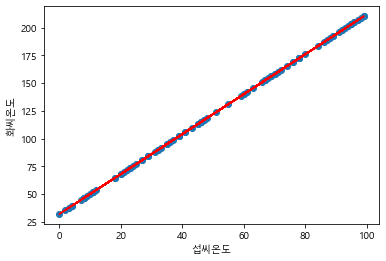

In [43]:
plt.scatter(C,F)
plt.plot(C,y_predict,c ='r')
plt.xlabel("섭씨온도")
plt.ylabel("화씨온도")
plt.show()

#### w,b모두 랜덤한 값으로 지정하기

In [44]:
w = np.random.uniform(low= -1.0,high=1.0) #weight에 대한 랜덤값
b = np.random.uniform(low= -1.0,high=1.0) #bias에 대한 랜덤값

w,b

(-0.6628013283770251, -0.671831495238632)

In [45]:
y_predict= w*X+b
y_predict[:10]

array([-47.06792448, -59.66114972, -39.77710987, -58.99834839,
       -52.37033511, -15.91626205, -65.62636168, -31.1606926 ,
        -7.96264611, -37.12590456])

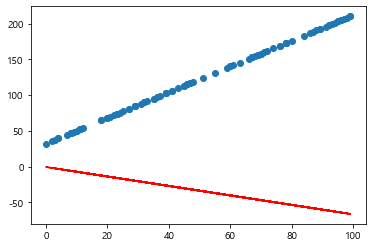

In [46]:
plt.scatter(C,F) #차이를 확인해본다.
plt.plot(C,y_predict,'r') #다시한번, C는 섭씨, F는 화씨. 우리의 목표는 화씨를 찾는것.
plt.show()

In [47]:
##어떻게 찾을까?

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
####  <span style="color:red">이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.</span>
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [ ]:
(y_predict -b )/X = w

In [53]:
num_epoch = 100000 #epoch -> 학습을 몇 회 반복할지, 즉 몇번의 for문을 돌릴지 세팅한다.
learning_rate = 0.0003

w = np.random.uniform(low= -1.0,high=1.0)
b = np.random.uniform(low= -1.0,high=1.0)

for epoch in range(num_epoch):
    #for 문안에서 가설을 세운다.
    y_predict = w*X+b 
    
    
    #오차 발생의 정도를 알기 위해서 MSE를 사용한다. (오차 평균) 
    #현재 오차를 구하여 error에 저장
    error = np.abs(y_predict - y).mean()
    if error < 0.1:
        break #에러가 0.1보다 적다면 ㅃㅃ
        
        
    #그게 아니라면 b를 조정해준다. 뭐로? learning rate로!
    b = b -learning_rate*(y_predict - y).mean()
    
    
    #마찬가지 논리로 w도 조정해준다. 
    w = w -learning_rate*((y_predict - y)*X).mean()             #여기에 X를 왜 곱해주는가? ????
    
    
    #10000회마다 epoch,b,w,error(cost를 출력해서 확인...)
    if epoch%10000 ==0:
        print(f"{epoch:5} w={w:.6f}, b={b:.6f},error={error:.6f}") #binding :


print("--------"*10)
print(f"{epoch:5} w={w:.6f}, b={b:.6f},error={error:.6f}")   
    

    0 w=2.297522, b=0.459264,error=73.047461
10000 w=2.008241, b=17.780701,error=6.160371
20000 w=1.893878, b=25.589715,error=2.777193
30000 w=1.842322, b=29.110142,error=1.252003
40000 w=1.819079, b=30.697206,error=0.564423
50000 w=1.808601, b=31.412680,error=0.254451
60000 w=1.803878, b=31.735227,error=0.114710
--------------------------------------------------------------------------------
61723 w=1.803381, b=31.769170,error=0.099997


In [30]:
X

array([21,  0, 84, 83, 78, 66, 31, 28, 99, 94, 72, 64, 66, 29,  3, 91,  9,
       64, 23, 79, 98, 51, 50, 45, 42, 33, 52, 55, 81, 12, 57, 53, 36, 98,
       76, 82, 76, 33, 63, 55, 51, 32,  4,  3, 15, 94,  6, 47, 23, 60, 22,
       52, 85, 63, 84, 49, 47, 99,  2, 96, 45,  3, 47, 63, 83,  8, 58, 97,
       45, 12, 54,  2, 92, 94, 60, 63, 28, 28,  8, 75, 11, 48,  8, 11, 70,
       69, 25, 84, 48, 84, 15, 44, 90, 78, 97, 92,  7, 11, 46,  1])

### Predict

In [32]:
#보정된 값을 이용해 
y_predict = w*C+b
y_predict[:5]

array([ 69.63586886,  31.76392064, 183.25171354, 181.44828743,
       172.4311569 ])

### DataFrame Visualization

In [33]:
result = pd.DataFrame({"C":C, "F":F, "F(predict)":y_predict})
result

,C,F,F(predict)
0,21,69.8,69.635869
1,0,32.0,31.763921
2,84,183.2,183.251714
3,83,181.4,181.448287
4,78,172.4,172.431157
...,...,...,...
95,92,197.6,197.679122
96,7,44.6,44.387903
97,11,51.8,51.601608
98,46,114.8,114.721522


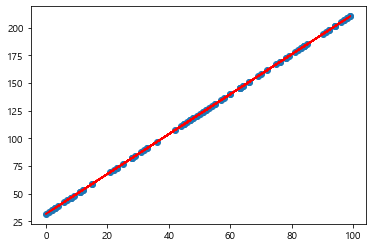

In [34]:
plt.scatter(C,F) #차이를 확인해본다.
plt.plot(C,y_predict,'r') #다시한번, C는 섭씨, F는 화씨. 우리의 목표는 화씨를 찾는것.
plt.show()

#### <span style="color:blue">선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.</span>